In [1]:
from matplotlib import pyplot as plt
from mnist import MNIST #pip install python-mnist
import random as r
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
mndata = MNIST('data')
images, labels = mndata.load_training()

test_images, test_labels = mndata.load_testing()

print("Immagini training: {}, immagini test: {}".format(len(images), len(test_images)))

Immagini training: 60000, immagini test: 10000


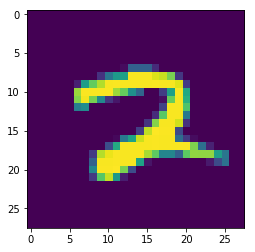

In [3]:
n = r.randint(0,len(images))
image = [images[n][x:x+28] for x in range(0, len(images[n]),28)]
plt.imshow(image)
plt.show()

In [4]:
nn=MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(54,3), max_iter=10000, learning_rate_init=0.0006)
nn.fit(images,labels)

pred = nn.predict(test_images)

giusti = list(pred == test_labels).count(True)
print("Accuracy: {} Sono stati riconosciuti {} numeri su {}".format(giusti / len(pred),giusti,len(pred)))

Accuracy: 0.9094 Sono stati riconosciuti 9094 numeri su 10000


# Da qua in poi sono prove

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
X_pca30 = pca.transform(images)

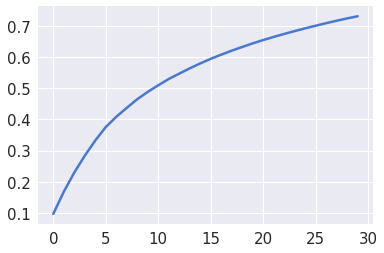

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

plt.plot(range(30), pca.explained_variance_ratio_.cumsum())
plt.show()

In [28]:
def scatter(x, labels):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], 
                    c=palette[labels],
                    alpha=0.5)
    
    plt.xlim(-25, 25)    # we fix X and Y range
    plt.ylim(-25, 25)    # (-25, 25) hardcoded after inspection
    ax.axis('off')       # we don't actually need axes
    ax.axis('tight')     # this avoids a cluttered graph

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position each label on the median of the corresponding mapped points.
        if np.sum([labels==i]):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)

    return f, ax, sc, txts

In [29]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(images)

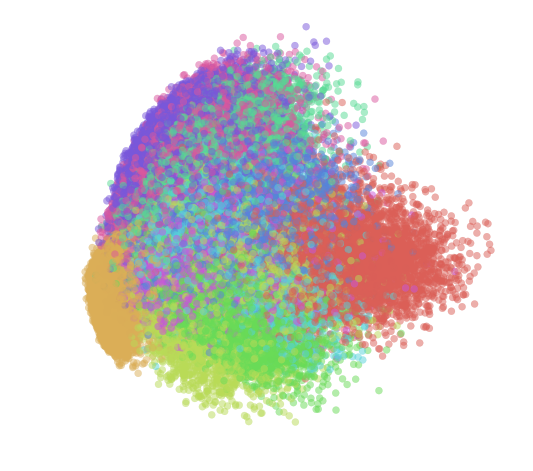

In [30]:
fig_pca, ax_pca, _, _ = scatter(X_pca2, np.array(labels))
plt.show()

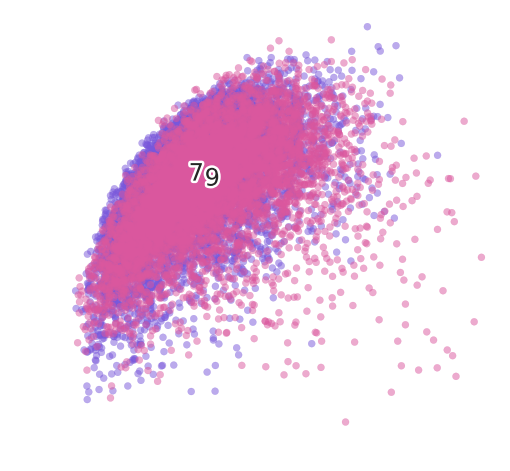

In [44]:
def extract(X, y, i1, i2):
    X_proj = np.vstack([X[[y==i1]], X[[y==i2]]])
    y_proj = np.hstack([y[[y==i1]], y[[y==i2]]])
    return X_proj, y_proj

_ = scatter(*extract(X_pca2, np.array(labels), 7, 9))
plt.show()

In [41]:
x

array([False, False, False, ..., False, False, False])

In [ ]:
import datetime
import math
from sklearn.manifold import TSNE

rs = 20190105

# this is just to print time values in a more human readable form
def to_hhmmss(seconds):
    times = list(map(int, str(datetime.timedelta(seconds=math.floor(seconds))).split(':')))
    units = ('hour', 'minute', 'second')
    plurals = ['s' if int(t) else '' for t in times]

    return ' '.join(['{} {}{}'.format(t, u, p)
                    for t, u, p in zip(times, units, plurals) if t])

#time_start = time.time()
X_tsne = TSNE(random_state=rs).fit_transform(images)    # use the optional argument random_state in order to set the random seed
#print('t-SNE with two components done! Time elapsed: {}'.format(to_hhmmss(time.time()-time_start)))

In [ ]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y)
plt.show()